In [25]:
import pandas as pd
import numpy as np
import requests
import os

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt

#First Phase

In [26]:
# Load the file path - location: my personal GitHub repository

url = 'https://raw.githubusercontent.com/Giofabro/exercise-data-analysis/main/Data_Repository/concrete_data.csv' # Changed the url to the raw file URL
response = requests.get(url)
open('concrete_data.csv', 'wb').write(response.content)

# Read the CSV file directly from the URL
concrete_data = pd.read_csv(url)

# Display the first rows of the DataFrame
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [27]:
concrete_data.isnull().sum()

,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0


In [28]:
concrete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


# Second phase

In [29]:
#Separazione tra train e test

X = concrete_data.drop('Strength', axis=1)
y = concrete_data['Strength']

### train & test


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

### StandarScaler

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model A: simple version

In [32]:
# Building the Keras model _ Model A: simple
model_A = Sequential()
# hidden layer (1 hidden layer with 10 neurons)
model_A.add(Dense(10, activation='relu', input_shape=(X_train_scaled.shape[1],)))
# output layer
model_A.add(Dense(1))  # Output layer for regression

# Compile the model
model_A.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_A = model_A.fit(
    X_train_scaled, y_train,
    validation_split=0.2,  # Use 20% of the training set as validation
    epochs=50,
    verbose=1  # To see progress during training
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1790.8892 - val_loss: 1656.3080
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1579.9781 - val_loss: 1642.8568
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1578.4812 - val_loss: 1629.8430
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1536.1394 - val_loss: 1617.1887
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1622.0923 - val_loss: 1605.2638
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1610.8495 - val_loss: 1593.6008
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1617.5895 - val_loss: 1582.3783
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1631.6617 - val_loss: 1571.1442
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1531.8593 - val_loss: 1560.1686
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1569.4694 - val_loss: 1549.1294
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1545.9473 - val_loss: 1538.1692
Epoch 12/50
18/18 

In [33]:
# Prediction on the test set
y_pred_A = model_A.predict(X_test_scaled)

# Calculate the MSE
mse_A = mean_squared_error(y_test, y_pred_A)
print("Part A - Baseline Model MSE:", mse_A)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Part A - Baseline Model MSE: 736.1377650611016


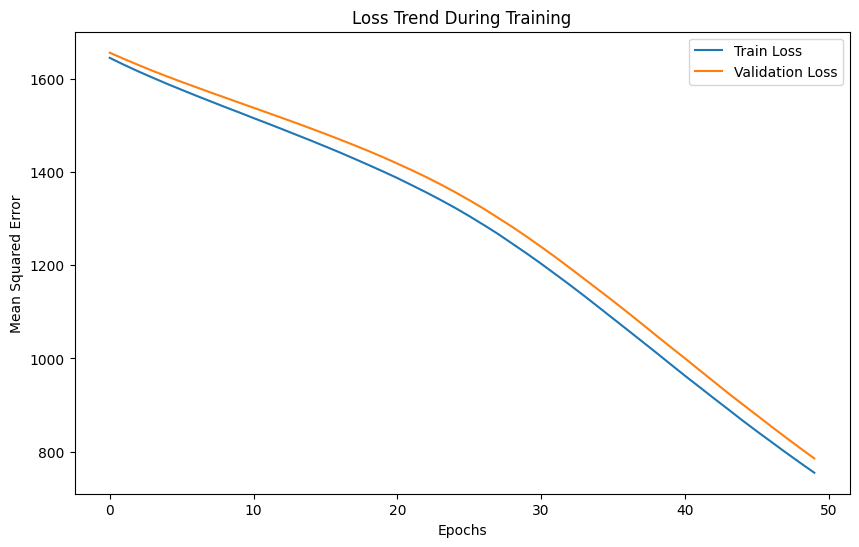

In [34]:
# Plot training and validation loss
plt.figure(figsize=(10,6))
plt.plot(history_A.history['loss'], label='Train Loss')
plt.plot(history_A.history['val_loss'], label='Validation Loss')
plt.title('Loss Trend During Training')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

# Model B: complex version

In [35]:
# More complex model_B
model_B = Sequential()
# first hidden layer
model_B.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
# second hidden layer
model_B.add(Dense(64, activation='relu'))
# output layer
model_B.add(Dense(1))

# Compile the model
model_B.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_B = model_B.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,  # Increase number of epochs compared to model A
    verbose=1  # To see progress during training
)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 1630.4303 - val_loss: 1572.1693
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1416.8806 - val_loss: 1467.7892
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1418.1041 - val_loss: 1296.0118
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1165.9833 - val_loss: 1045.4261
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 921.0197 - val_loss: 737.1569
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 624.8859 - val_loss: 444.6440
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 353.1139 - val_loss: 269.8739
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 264.2337 - val_loss: 206.2658
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 233.4259 - val_loss: 187.4839
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 197.7541 - val_loss: 182.6485
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 223.7593 - val_loss: 178.8668
Epoch 12/100
18/18 ━━━

In [36]:
# Prediction on the test set
y_pred_B = model_B.predict(X_test_scaled)

# Calculate the MSE
mse_B = mean_squared_error(y_test, y_pred_B)
print("Part B - Model B MSE:", mse_B)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Part B - Model B MSE: 47.35295679346967


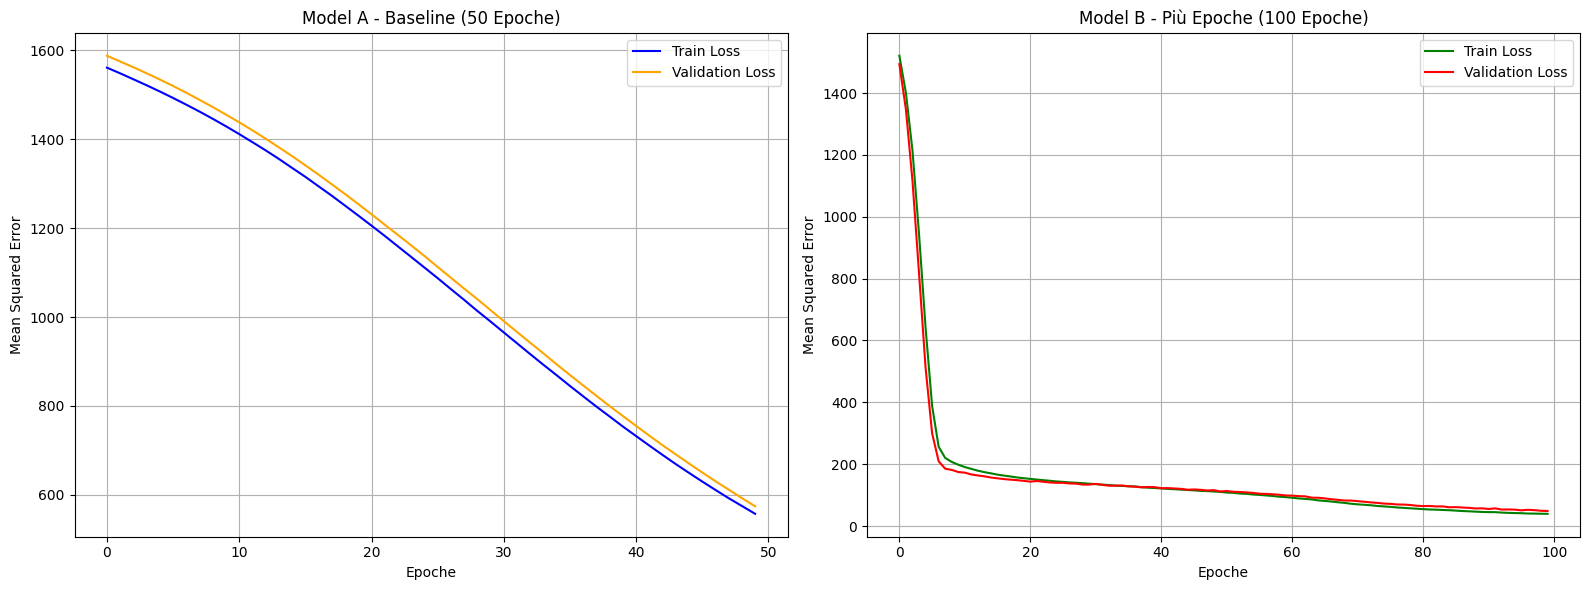

In [24]:
# Plot for Model A
axes[0].plot(history_A.history['loss'], label='Train Loss', color='blue')
axes[0].plot(history_A.history['val_loss'], label='Validation Loss', color='orange')
axes[0].set_title('Model A - Baseline (50 Epochs)')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Mean Squared Error')
axes[0].legend()
axes[0].grid(True)

# Plot for Model B
axes[1].plot(history_B.history['loss'], label='Train Loss', color='green')
axes[1].plot(history_B.history['val_loss'], label='Validation Loss', color='red')
axes[1].set_title('Model B - More Epochs (100 Epochs)')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Mean Squared Error')
axes[1].legend()
axes[1].grid(True)

# Improve overall appearance
plt.tight_layout()
plt.show()

Model B achieved a significantly lower MSE of 47.35 compared to Model A's MSE of 281.02.
This improvement is due to the addition of more neurons and hidden layers in Model B.
By increasing the complexity of the neural network, Model B is better able to capture the underlying
patterns in the data, leading to more accurate predictions.
An MSE of 47.35 indicates that, on average, the squared difference between the predicted and actual
Strength values is 47.35, which shows enhanced performance over the baseline model.

If we calculate the Root Mean Squared Error (RMSE) of our model B result we get 6.88. This means that the model predictions are, on average, about 6.88 units away from the actual values of Strength.